In [109]:
import numpy as np
import pandas as pd

In [110]:
data=pd.read_csv('mobile_price_classification.csv')
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [111]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [112]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [113]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [114]:
x=data.drop('price_range',axis=1)
y=data['price_range']

In [115]:
y.unique()

array([1, 2, 3, 0])

In [116]:
cols=x.columns

In [117]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x=pd.DataFrame(x,columns=cols)

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
#We are going to creat ANN model using tensorflow and keras

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.losses import CategoricalCrossentropy

In [122]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
160/160 [==============================] - 2s 6ms/step - loss: 1.0024 - accuracy: 0.5556 - val_loss: 0.5168 - val_accuracy: 0.8175
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8506 - val_loss: 0.3030 - val_accuracy: 0.8675
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 0.2304 - accuracy: 0.9075 - val_loss: 0.2117 - val_accuracy: 0.9250
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.1635 - accuracy: 0.9362 - val_loss: 0.2316 - val_accuracy: 0.9125
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.9538 - val_loss: 0.1841 - val_accuracy: 0.9150
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9656 - val_loss: 0.2250 - val_accuracy: 0.9175
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9744 - val_loss: 0.1685 - val_accuracy: 0.9325

In [123]:
import matplotlib.pyplot as plt

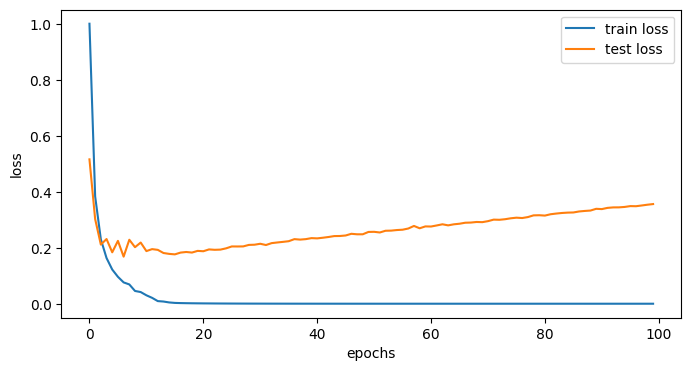

In [124]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'])
plt.show()

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 2.3156 - accuracy: 0.5881 - val_loss: 1.4250 - val_accuracy: 0.8400
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 1.1299 - accuracy: 0.8731 - val_loss: 0.9262 - val_accuracy: 0.8925
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.7946 - accuracy: 0.9087 - val_loss: 0.7271 - val_accuracy: 0.8925
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6325 - accuracy: 0.9344 - val_loss: 0.6019 - val_accuracy: 0.9225
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5497 - accuracy: 0.9431 - val_loss: 0.5470 - val_accuracy: 0.8950
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.4810 - accuracy: 0.9506 - val_loss: 0.4853 - val_accuracy: 0.9300
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4506 - accuracy: 0.9444 - val_loss: 0.4960 - val_accuracy: 0.9100

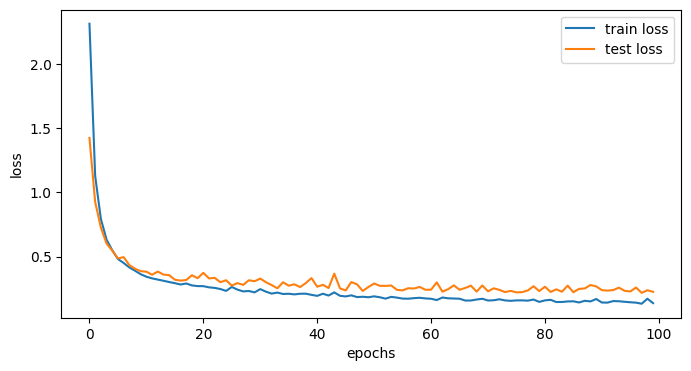

13/13 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.9475
Test Accuracy: 0.9474999904632568


In [125]:
model2=Sequential()
model2.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01)))
model2.add(Dense(128,activation='relu',kernel_regularizer=l2(0.01)))
model2.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01)))
model2.add(Dense(4,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history2=model2.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))
plt.figure(figsize=(8,4))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'])
plt.show()
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/100
160/160 [==============================] - 2s 5ms/step - loss: 8.8466 - accuracy: 0.3837 - val_loss: 2.8614 - val_accuracy: 0.4825
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 1.7681 - accuracy: 0.4794 - val_loss: 1.2884 - val_accuracy: 0.6575
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 1.0721 - accuracy: 0.6794 - val_loss: 0.8861 - val_accuracy: 0.8000
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.8144 - val_loss: 0.7143 - val_accuracy: 0.8725
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.8831 - val_loss: 0.5825 - val_accuracy: 0.9275
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.9269 - val_loss: 0.4944 - val_accuracy: 0.9650
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4796 - accuracy: 0.9500 - val_loss: 0.4438 - val_accuracy: 0.9675

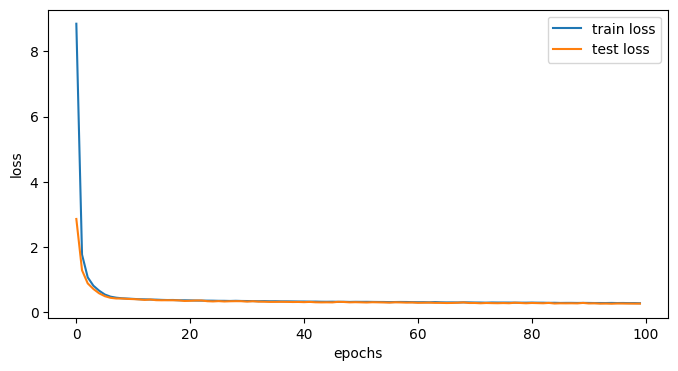

13/13 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.9475
Test Accuracy: 0.9474999904632568


In [126]:
model3=Sequential()
model3.add(Dense(64,activation='relu',kernel_regularizer=l1(0.01)))
model3.add(Dense(128,activation='relu',kernel_regularizer=l1(0.01)))
model3.add(Dense(64,activation='relu',kernel_regularizer=l1(0.01)))
model3.add(Dense(4,activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history3=model3.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))
plt.figure(figsize=(8,4))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss','test loss'])
plt.show()
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')

In [129]:
#trying out hyperparameter tuning

In [138]:
from hyperopt import tpe,hp,fmin,STATUS_OK,Trials

In [139]:
space={
    "neuron":hp.quniform("neuron",1,128,1)
}

In [144]:
from keras.src.backend import sigmoid
def hyperparameter_tuning(params):
  print(params)
  model=Sequential()
  model.add(Dense(units=params['neuron'],activation='relu',kernel_regularizer=l1(0.01)))
  model.add(Dense(units=params['neuron'],activation='relu',kernel_regularizer=l1(0.01)))
  model.add(Dense(units=params['neuron'],activation='relu',kernel_regularizer=l1(0.01)))
  model.add(Dense(4,activation='softmax',kernel_regularizer=l1(0.01)))
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test),verbose=0)
  scores=model.evaluate(x_test,y_test,verbose=0)
  print(f"Accuracy:{scores[1]*100}")
  return{'loss':scores[1],"status":STATUS_OK}

In [147]:
trials=Trials()
best=fmin(
    fn=hyperparameter_tuning,
    space=space,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials
)
print("Best :{}".format(best))

{'neuron': 28.0}
Accuracy:99.00000095367432
{'neuron': 21.0}
Accuracy:97.75000214576721
{'neuron': 89.0}
Accuracy:23.000000417232513
{'neuron': 107.0}
Accuracy:22.750000655651093
{'neuron': 96.0}
Accuracy:22.750000655651093
{'neuron': 13.0}
Accuracy:99.25000071525574
{'neuron': 106.0}
Accuracy:22.750000655651093
{'neuron': 47.0}
Accuracy:99.00000095367432
{'neuron': 74.0}
Accuracy:99.50000047683716
{'neuron': 114.0}
Accuracy:22.750000655651093
100%|██████████| 10/10 [09:08<00:00, 54.89s/trial, best loss: 0.22750000655651093]
Best :{'neuron': 107.0}
